In [127]:
library(vegan)
library(microbiome)
library(tidyverse)
library(here)

In [128]:
# load data and helper functions
source("https://raw.githubusercontent.com/HenrikEckermann/in_use/master/bayesian_helper.R")
source("https://raw.githubusercontent.com/HenrikEckermann/in_use/master/mb_helper.R")
load(here("data/data_transfer.RData"))
source(here("R/read.R"))

In [129]:
# take over the meta variables I created in other docs
meta_new <- data_transfer[, 1:9] 

In [130]:
head(meta_new)

subject_id,sample_id,time,cc,age_d,age_d_s,bf_count,bf_count_s,bf_ratio
207,sa_10000,post,no,98.00,0.0320946,6.00,0.43948544,1
388,sa_10038,post,yes,98.00,0.0320946,0.00,-1.65710371,0
381,sa_10118,post,yes,108.00,0.5275689,6.59,0.64565004,1
283,sa_10211,post,yes,107.03,0.4795079,5.00,0.09005391,1
216,sa_10230,post,no,100.00,0.1311895,7.00,0.78891696,1
277,sa_10247,pre,yes,79.00,-0.9093066,6.10,0.47442859,1


In [131]:
# create catories for bf and childcare and specifically for ccyes vs rest
meta_new <- meta_new %>%
  mutate(
      groups = ifelse(time == "pre" & cc == "no", "noCCpre", ifelse(
          time == "pre" & cc == "yes", "CCpre", ifelse(
              time == "post" & cc == "no", "noCCpost", "CCpost"))),
      bf = ifelse(bf_ratio <= 0.25, "lowBF", ifelse(
          bf_ratio <0.75, "mediumBF", "highBF")),
      ccpost = ifelse(groups == "CCpost", 1, 0)) %>% 
  mutate(
      groups = as.factor(groups), 
      bf = as.factor(bf), 
      ccpost = as.factor(ccpost))

In [132]:
# create new pseq object (read.R results in the object "genus" Leo created)
otu <- otu_to_df(genus, transpose = FALSE)
otu <- otu %>% 
    select(species, meta_new$sample_id) %>% 
    df_to_otu()
pseq <- phyloseq(otu, df_to_sd(meta_new), tax_table(genus))
# add diversity indeces to sample data
diversities <- 
    global(pseq, index = "all") %>% 
    select(contains("diversities")) %>% 
    rownames_to_column("sample_id")
colnames(diversities) <- gsub("diversities_", "", colnames(diversities))

sample_data(pseq) <- 
    sd_to_df(pseq) %>% 
    left_join(diversities, by = "sample_id") %>%
    df_to_sd()
meta <- sd_to_df(pseq)
# clr and relative abundance transformation to deal with compositionality of mb data
pseq.clr <- microbiome::transform(pseq, transform = "clr")
pseq.rel <- microbiome::transform(pseq, "compositional")

Richness
Observed (richness 0)
Diversity
Evenness
Dominance
Rarity
Warning message in class(x) <- c(subclass, "tbl_df", "tbl", "data.frame"):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”Warning message:
“Setting row names on a tibble is deprecated.”Warning message in class(x) <- c(subclass, "tbl_df", "tbl", "data.frame"):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”

# PERMANOVA

In [133]:
otus.rel

,Actinomycetaceae,Atopobium,Bifidobacterium,Collinsella,Corynebacterium,Eggerthella lenta et rel.,Micrococcaceae,Propionibacterium,Asteroleplasma et rel.,Aerococcus,⋯,Serratia,Sutterella wadsworthia et rel.,Vibrio,Xanthomonadaceae,Yersinia et rel.,Brachyspira,Uncultured Clostridiales I,Uncultured Clostridiales II,Uncultured Mollicutes,Akkermansia
sa_10000,0.0005768643,6.024157e-04,0.387798345,0.1368558446,0.0007023006,0.0035680367,2.071481e-04,0.0006412314,2.064812e-04,2.080366e-04,⋯,2.161411e-04,0.0024220331,0.0012938483,0.0004724778,0.0008438400,4.167585e-04,0.006588597,0.005690543,0.0029513356,0.0007522681
sa_10038,0.0003172958,3.107216e-04,0.331494774,0.0012345378,0.0004785423,0.0013176284,2.105603e-04,0.0004539687,1.500263e-04,2.630510e-04,⋯,1.904546e-04,0.0015395247,0.0006189329,0.0003319483,0.0006271313,3.021149e-04,0.004578808,0.004066876,0.0021250919,0.0109883278
sa_10118,0.0001257529,1.494264e-04,0.145711016,0.0011885098,0.0001858020,0.0003848076,5.890206e-05,0.0002710146,5.807628e-05,6.065545e-05,⋯,8.684105e-04,0.0006133202,0.0002509934,0.0001365837,0.0002398868,1.162304e-04,0.001761232,0.001524045,0.0008175911,0.0001270004
sa_10211,0.0004342801,3.953805e-04,0.519162613,0.0010605537,0.0006293611,0.0012719561,2.118374e-04,0.0006198981,1.908267e-04,2.319869e-04,⋯,2.077269e-04,0.0019942682,0.0007829796,0.0004477259,0.0008007020,3.883847e-04,0.005953192,0.005158127,0.0027732329,0.0004359974
sa_10230,0.0002833717,2.254078e-04,0.817911858,0.0020826594,0.0004214562,0.0008021736,1.339752e-04,0.0003740914,1.076928e-04,1.197056e-04,⋯,1.649923e-04,0.0011605561,0.0004416247,0.0002526142,0.0004392680,2.159399e-04,0.003299851,0.002817305,0.0015314227,0.0002535087
sa_10247,0.0003618982,1.794827e-04,0.866560152,0.0006057084,0.0003974252,0.0008639810,9.192738e-05,0.0005033554,9.352971e-05,8.788113e-05,⋯,9.048256e-05,0.0011120532,0.0005070891,0.0002813502,0.0004146660,1.708103e-04,0.002738800,0.002349834,0.0012647583,0.0002250456
sa_1025,0.0002546031,2.130572e-04,0.817517436,0.0006728735,0.0003821226,0.0011422460,1.369558e-04,0.0007592132,1.050122e-04,1.580193e-04,⋯,1.078414e-04,0.0011958149,0.0004632508,0.0002946822,0.0004571987,2.041374e-04,0.003141960,0.002777550,0.0014573011,0.0002434892
sa_10268,0.0001032476,1.661070e-04,0.003059862,0.0003317456,0.0001837934,0.0003503987,1.347720e-04,0.0003781316,5.447172e-05,1.458453e-04,⋯,2.741426e-03,0.0011411363,0.0004596401,0.0008419255,0.0124197710,1.006599e-04,0.001553483,0.001618213,0.0007290036,0.0001018982
sa_1028,0.0003323909,3.683549e-04,0.530016578,0.0008553192,0.0005182412,0.0010823679,2.025913e-04,0.0004523280,1.461697e-04,2.592268e-04,⋯,2.866964e-03,0.0016769026,0.0006743139,0.0003827461,0.0018462296,2.920398e-04,0.004440536,0.003995688,0.0020715539,0.0004969528
sa_1030,0.0002777073,2.554264e-04,0.807294324,0.0007327522,0.0004364660,0.0009039993,1.963933e-04,0.0004421843,1.247914e-04,2.434728e-04,⋯,1.244941e-04,0.0014291621,0.0005159829,0.0003519908,0.0005235256,2.490850e-04,0.003807457,0.003837234,0.0017685097,0.0002947661


In [134]:
# how many NA? --> 4 CC and 1 no CC
# sd_to_df(pseq.rel) %>% filter(is.na(bf_count_s))
# complete cases for meta data and otus:
meta.rel <- sd_to_df(pseq.rel) %>% na.omit()
otus.rel <- otu_to_df(pseq.rel, transpose = F) %>% 
    column_to_rownames("species") %>%
    select(meta.rel$sample_id) %>%
    t() 

# Homogeneity assumption 
dist <- vegdist(otus.rel)
anova(betadisper(dist, meta.rel$cc))
anova(betadisper(dist, meta.rel$time))
anova(betadisper(dist, meta.rel$groups))
pm <- adonis(otus.rel ~ time * cc + age_d_s + bf_count_s, method = "bray", data = meta)

Warning message in class(x) <- c(subclass, "tbl_df", "tbl", "data.frame"):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Groups,1,0.01068243,0.01068243,0.2699699,0.6039764
Residuals,184,7.28068592,0.03956895,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Groups,1,0.04615282,0.04615282,1.16548,0.281745
Residuals,184,7.28637074,0.03959984,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Groups,3,0.1296026,0.04320085,1.106881,0.3476818
Residuals,182,7.1033456,0.03902937,NA,NA


In [135]:
pm$aov.tab

,Df,SumsOfSqs,MeanSqs,F.Model,R2,Pr(>F)
time,1,0.1280488,0.1280488,1.0703936,0.005701054,0.327
cc,1,0.0968952,0.0968952,0.8099728,0.004314019,0.540
age_d_s,1,0.2624608,0.2624608,2.1939793,0.011685415,0.059
bf_count_s,1,0.3064466,0.3064466,2.5616687,0.013643776,0.029
time:cc,1,0.1336999,0.1336999,1.1176332,0.005952658,0.327
Residuals,180,21.5329902,0.1196277,NA,0.958703079,NA
Total,185,22.4605414,NA,NA,1.000000000,NA


Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


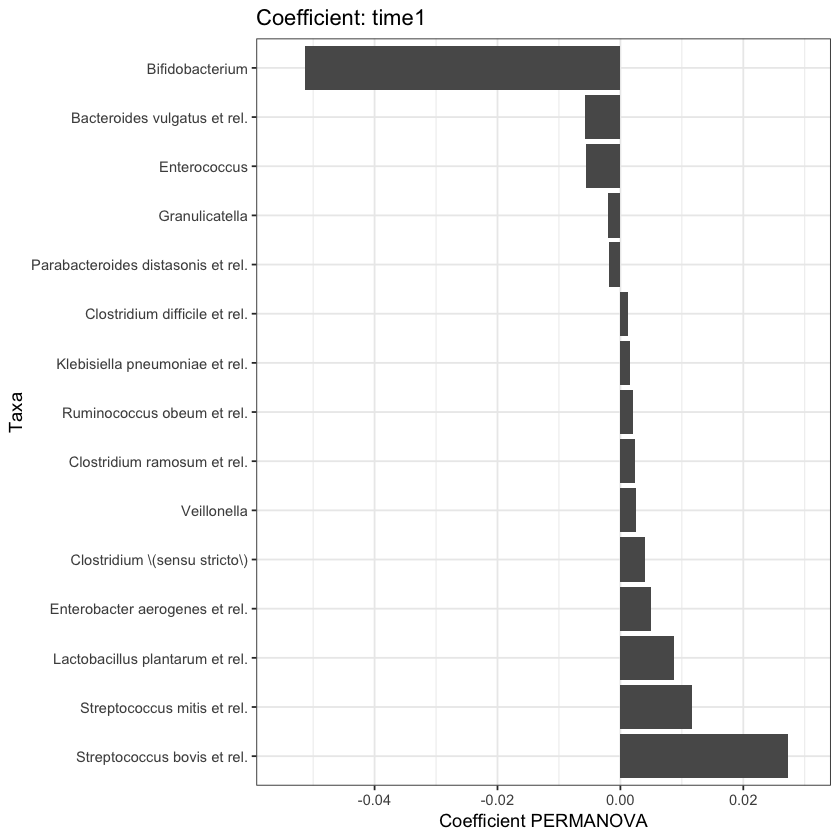

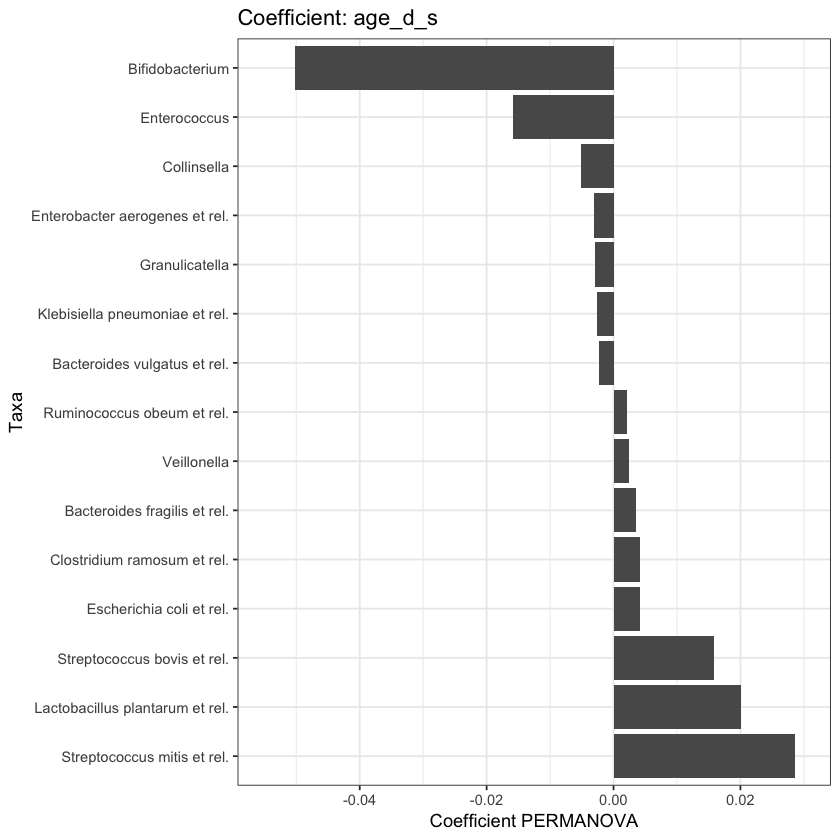

[[1]]

[[2]]

[[3]]

[[4]]


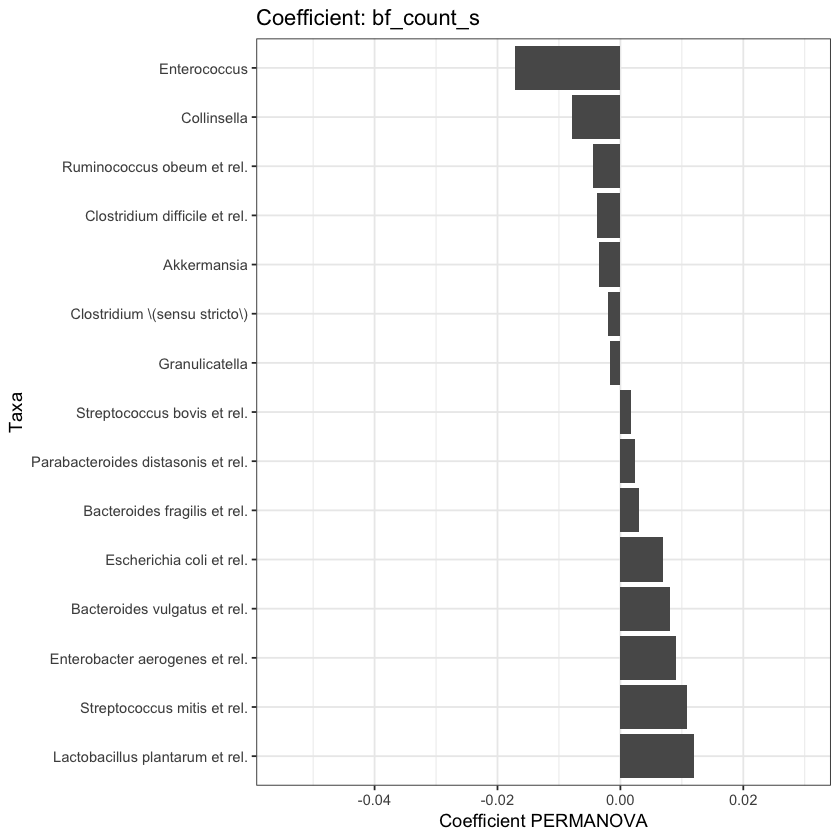

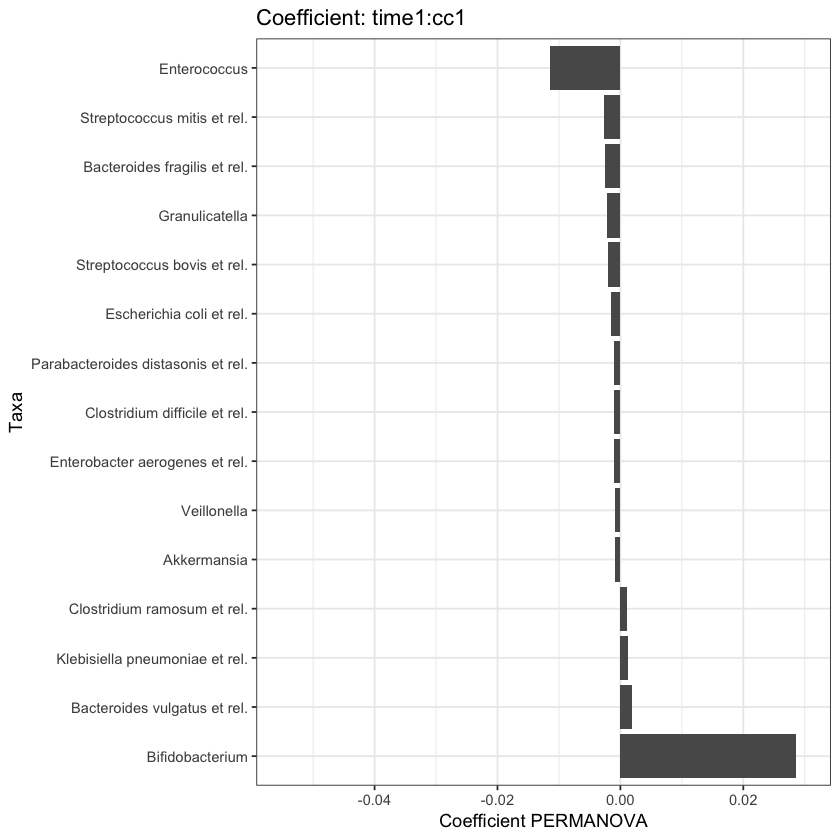

In [136]:
coef_v <- c("time1", "age_d_s", "bf_count_s", "time1:cc1")
pmps <- lapply(coef_v, function(x) {
    coef <- coefficients(pm)[x,] 
    # make plot that I can manipulate better for apa6th in case
    coef_top <- 
        coef[rev(order(abs(coef)))[1:15]] %>%
        as.data.frame() %>%
        rownames_to_column("top_taxa") 
    colnames(coef_top) <- c("top_taxa", "coef_top")

    coef_top <- coef_top %>% arrange(desc(coef_top)) %>%
                mutate(top_taxa = factor(top_taxa, levels = top_taxa))
     p <- ggplot(coef_top, aes(top_taxa, coef_top)) +
            geom_bar(stat="identity") +
            ylim(-0.055, 0.03) +
            xlab("Taxa") + ylab("Coefficient PERMANOVA") +
            ggtitle(glue::glue("Coefficient: {x}")) +
            coord_flip() +
            theme_bw()
    ggsave(here("fig/permanova.png"))
    p
})
pmps

In [137]:
### make tables for permanovs apa
pm_table <- rownames_to_column(pm$aov.tab, "Model Parameters")
pm_table <- 
  mutate_if(pm_table, is.numeric, funs(round(., 3))) %>%
    mutate(
      MeanSqs = ifelse(is.na(MeanSqs), "-", MeanSqs),
      F.Model = ifelse(is.na(F.Model), "-", F.Model),
      `Pr(>F)` = ifelse(is.na(`Pr(>F)`), "-", `Pr(>F)`)) %>%
    select(`Model Parameters`,SumsOfSqs, MeanSqs, F.Model, Df,`Pr(>F)`, R2)
colnames(pm_table) <- c("Model Parameter", "Sum of Squares", "Mean Sum of Squares", "F", "Df", "p", "R Square" )

In [138]:
pm_table

Model Parameter,Sum of Squares,Mean Sum of Squares,F,Df,p,R Square
time,0.128,0.128,1.07,1,0.327,0.006
cc,0.097,0.097,0.81,1,0.54,0.004
age_d_s,0.262,0.262,2.194,1,0.059,0.012
bf_count_s,0.306,0.306,2.562,1,0.029,0.014
time:cc,0.134,0.134,1.118,1,0.327,0.006
Residuals,21.533,0.12,-,180,-,0.959
Total,22.461,-,-,185,-,1.000


# Principal Coordinate Analysis

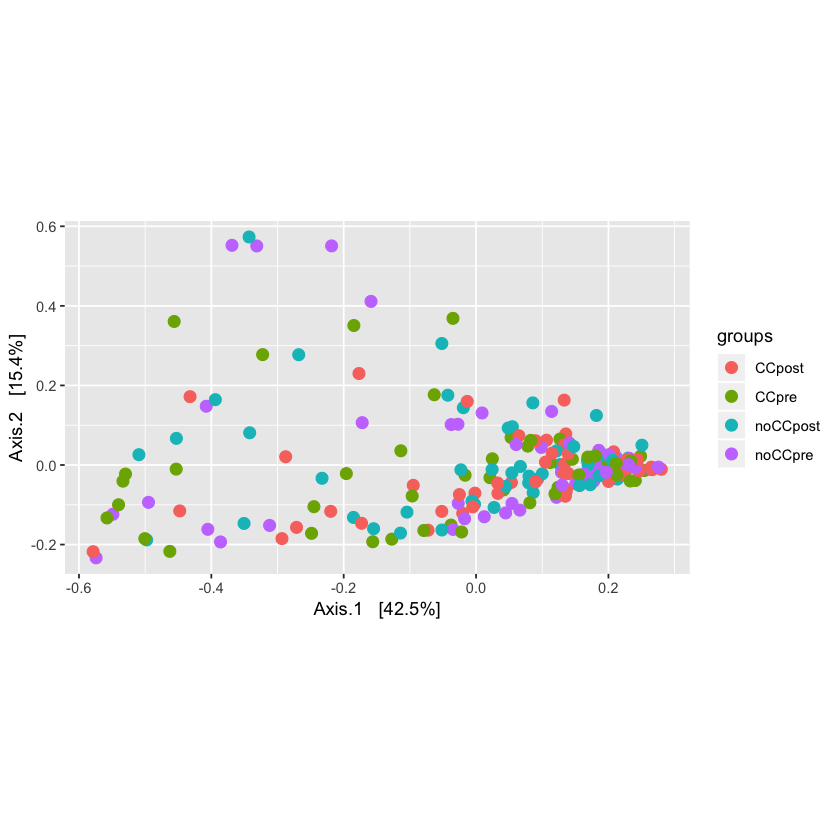

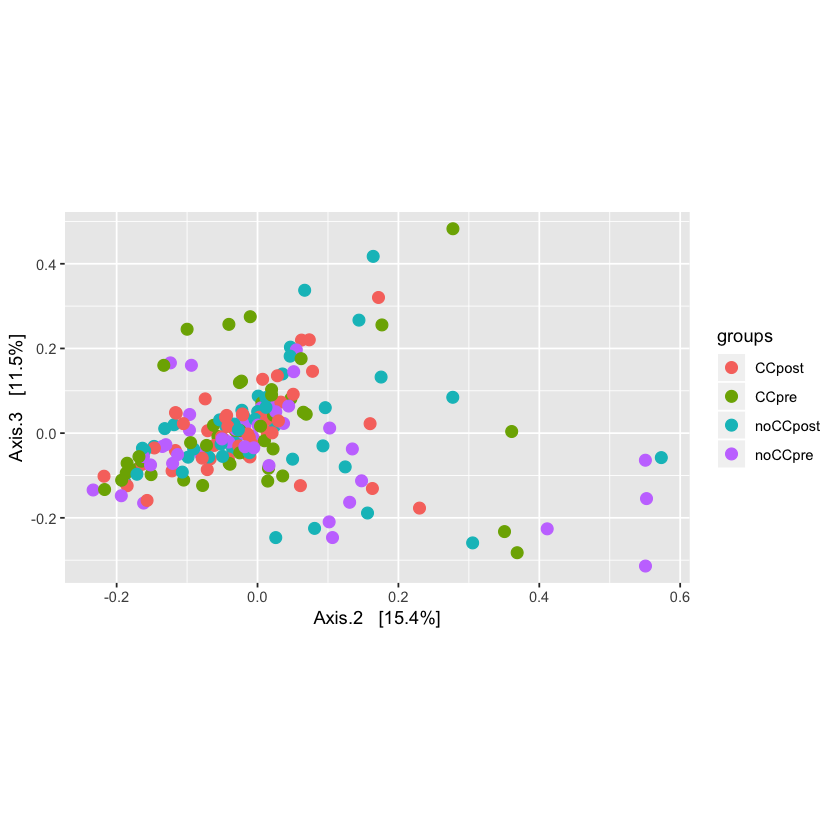

In [139]:
# PCoA bray, can we differentiate the post CC from all other infants?
cc_pcoa <- ordinate(pseq.rel, method = "PCoA", distance = "bray")
e_values <- cc_pcoa$values$Eigenvalues
plot_ordination(pseq.rel, cc_pcoa, color = "groups") +
    geom_point(size = 3) +
    coord_fixed(sqrt(e_values[2] / e_values[1])) 
# axes 2:3
plot_ordination(pseq.rel, cc_pcoa, color = "groups", axes = 2:3) +
    geom_point(size = 3) +
    coord_fixed(sqrt(e_values[2] / e_values[1])) 

# Hierarchical Generalized Linear Models

In [140]:
library(brms)
library(broom)
library(parallel)
options(mc.cores = 6)

In [141]:
otus.clr <- otu_to_df(pseq.clr)
colnames(otus.clr) <- gsub(" ", "_", colnames(otus.clr))
colnames(otus.clr)[which(colnames(otus.clr) == "Clostridium_\\(sensu_stricto\\)")] <- "Clostridium_sensu_stricto"
data <- sd_to_df(pseq.clr) %>%
    left_join(otus.clr, by = "sample_id")

Warning message in class(x) <- c(subclass, "tbl_df", "tbl", "data.frame"):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”

## Alpha diversity regressed on X

I started with a prior of exp(10). From my limited experience, models will converge if I use a strong prior here. The prior assigns low probability to high variation of the distribution of the intercepts and slopes per individual.

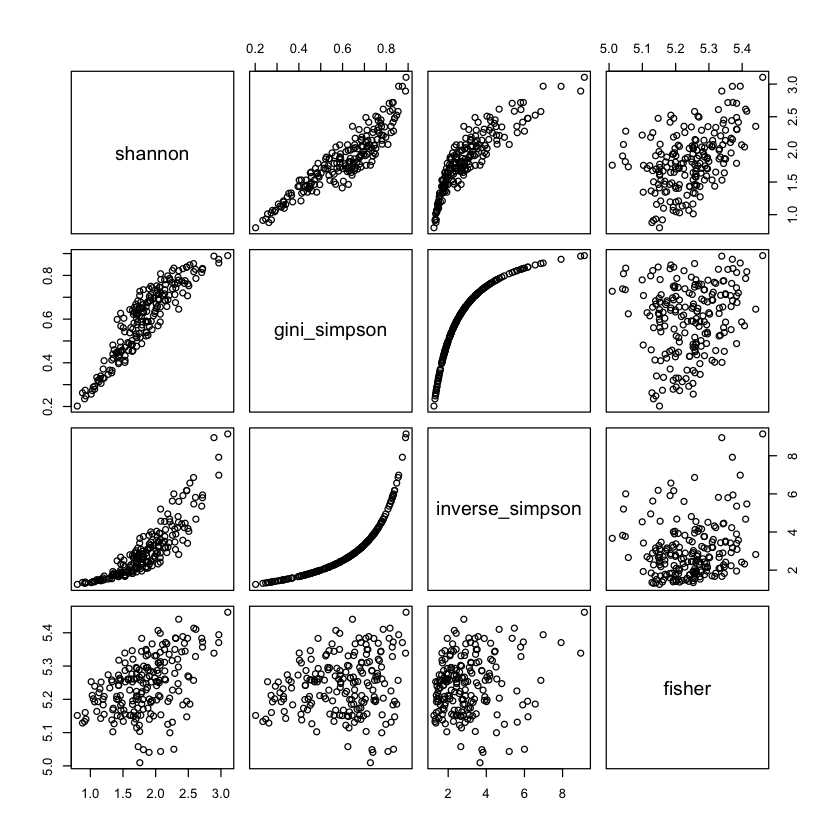

,shannon,gini_simpson,inverse_simpson,fisher
shannon,1.0000000,0.9164825,0.8751894,0.4663433
gini_simpson,0.9164825,1.0000000,0.8733149,0.1690169
inverse_simpson,0.8751894,0.8733149,1.0000000,0.1793250
fisher,0.4663433,0.1690169,0.1793250,1.0000000


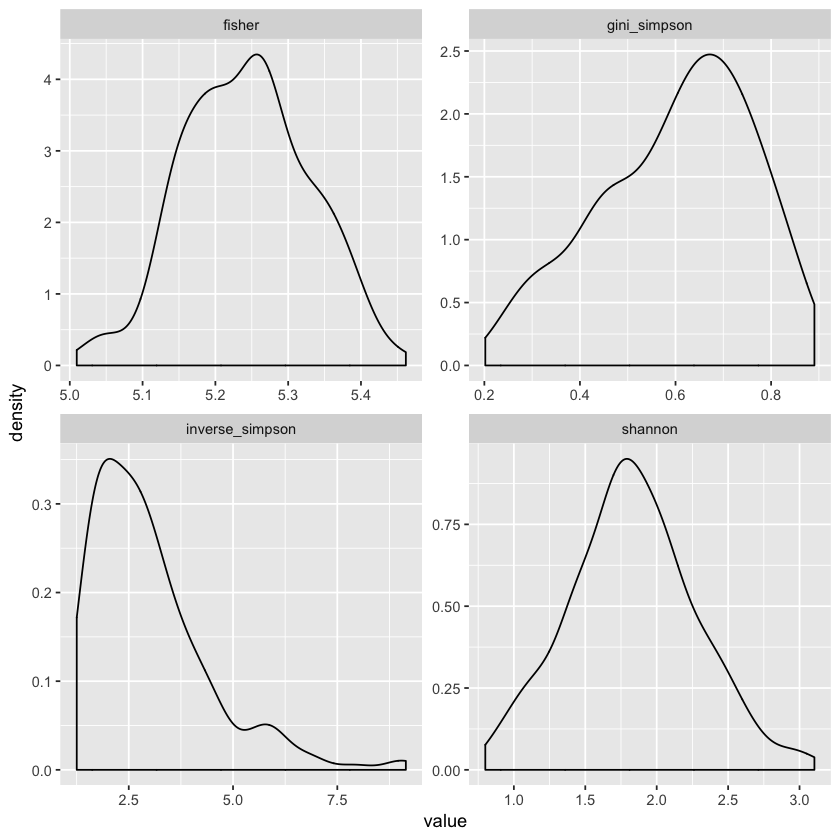

In [142]:
data %>% 
    select(shannon, gini_simpson, inverse_simpson, fisher) %>%
    pairs()

data %>% 
    select(shannon, gini_simpson, inverse_simpson, fisher) %>%
    gather(index, value) %>%
    ggplot(aes(value)) +
    geom_density() +
    facet_wrap(~index, scales = "free")

data %>% 
    select(shannon, gini_simpson, inverse_simpson, fisher) %>%
    cor()

In [143]:
dir.create(here("models/final_analyses"))
folder <- here("models/final_analyses")
diversity_index <- c("shannon", "inverse_simpson", "gini_simpson", "fisher")

Warning message in dir.create(here("models/final_analyses")):
“'/Users/henrikeckermann/workspace/research_master/minor_research_project/article/analyses/bibo/models/final_analyses' already exists”

### Model specification
I will define different models using either gaussian or skew_normal distribution and also using either the integrated missing value treatment from BRMS or not. The rationale behind using it is that I will have more power to evaluate the hypotheses whether CC has effect on MB. Breastfeeding is a covariate and the uncertainty introduced imputation will be reflected in the posterior. 

The skew_normal should better be able to deal with the inverse simpson but in the end both should be fine.

In [144]:
# # create directories
# lapply(diversity_index, function(x) {
#     dir.create(glue("{folder}/{x}"))
#     dir.create(glue("{folder}/{x}/gaussian"))
#     dir.create(glue("{folder}/{x}/skew_normal"))
# })

In [161]:
prior <- 
    c(
        set_prior("normal(0, 2)", class = "b"),
        set_prior("exponential(10)", class = "sd"),
        set_prior("normal(0, 10)", class = "Intercept"),
        set_prior("lkj(2)", class = "cor")
    )

brm_div <- 
    function(diversity_index) {
        # formula
        f <- as.formula(glue("{diversity_index} ~ cc*time + age_d_s + bf_count_s + (1 + time + age_d_s + bf_count_s|subject_id)"))
        formula <- bf(f) 
        model_file <- glue("{folder}/{diversity_index}/gaussian/full")
        #fit model
        brm(
            family = gaussian(), data = data, formula = formula,
            warmup = 1000, control = list(adapt_delta = 0.9999, max_treedepth = 15),
            prior = prior, file = model_file
        )
}


brm_div_mi <- function(diversity_index) {
        # delete _ for prior
        div_prior <- gsub("_", "", diversity_index)
        # specify prior for mi version
        prior_n <- c(
            set_prior("normal(0, 2)", class = "b", resp = div_prior),
            set_prior("exponential(10)", class = "sd", resp = div_prior),
            set_prior("normal(0, 10)", class = "Intercept", resp = div_prior), 
            set_prior("lkj(2)", class = "cor"),             
            set_prior("normal(0, 2)", class = "b", resp = "bfcounts"),
            set_prior("exponential(10)", class = "sd", resp = "bfcounts"),
            set_prior("normal(0, 10)", class = "Intercept", resp = "bfcounts")
        )
        # formula
        f1 <- as.formula(glue("{diversity_index} |mi() ~ cc*time + age_d_s + mi(bf_count_s) + (1 + time + age_d_s + mi(bf_count_s)|subject_id)"))
        f2 <- as.formula(glue("bf_count_s |mi() ~ cc*time + {diversity_index} + age_d_s + (1 + time + age_d_s + {diversity_index}|subject_id)"))
        formula <- bf(f1) + bf(f2) + set_rescor(FALSE)
        model_file <- glue("{folder}/{diversity_index}/gaussian/full_mi")
        #fit model
        brm(
            family = gaussian(), data = data, formula = formula,
            warmup = 1000, control = list(adapt_delta = 0.9999, max_treedepth = 15), 
            prior = prior_n, file = model_file
        )
}

brm_div_skew <- 
    function(diversity_index) {
        # formula
        f <- as.formula(glue("{diversity_index} ~ cc*time + age_d_s + bf_count_s + (1 + time + age_d_s + bf_count_s|subject_id)"))
        formula <- bf(f) 
        model_file <- glue("{folder}/{diversity_index}/skew_normal/full")
        #fit model
        brm(
            family = skew_normal(), data = data, formula = formula,
            warmup = 1000, control = list(adapt_delta = 0.9999), 
            prior = prior, file = model_file
        )
}


brm_div_skew_mi <- function(diversity_index) {
        # delete _ for prior
        div_prior <- gsub("_", "", diversity_index)
        # specify prior 
        prior_n <- c(
            set_prior("normal(0, 2)", class = "b", resp = div_prior),
            set_prior("exponential(10)", class = "sd", resp = div_prior),
            set_prior("normal(0, 10)", class = "Intercept", resp = div_prior), 
            set_prior("lkj(2)", class = "cor"),             
            set_prior("normal(0, 2)", class = "b", resp = "bfcounts"),
            set_prior("exponential(10)", class = "sd", resp = "bfcounts"),
            set_prior("normal(0, 10)", class = "Intercept", resp = "bfcounts"))
        # formula
        f1 <- as.formula(glue("{diversity_index} |mi() ~ cc*time + age_d_s + mi(bf_count_s) + (1 + time + age_d_s + mi(bf_count_s)|subject_id)"))
        f2 <- as.formula(glue("bf_count_s |mi() ~ cc*time + {diversity_index} + age_d_s + (1 + time + age_d_s + {diversity_index}|subject_id)"))
        formula <- bf(f1) + bf(f2) + set_rescor(FALSE)
        model_file <- glue("{folder}/{diversity_index}/skew_normal/full_mi")
        #fit model
        brm(
            family = skew_normal(), data = data, formula = formula,
            warmup = 1000, control = list(adapt_delta = 0.9999, max_treedepth = 15), 
            prior = prior_n, file = model_file
        )
}

In [162]:
# gaussian family and listwise deletion
div_models <- lapply(diversity_index, brm_div)

In [158]:
div_models[[4]]

Warning message:
“There were 17 divergent transitions after warmup. Increasing adapt_delta above 0.9999 may help.
See http://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup”

 Family: gaussian 
  Links: mu = identity; sigma = identity 
Formula: fisher ~ cc * time + age_d_s + bf_count_s + (1 + time + age_d_s + bf_count_s | subject_id) 
   Data: data (Number of observations: 186) 
Samples: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup samples = 4000

Group-Level Effects: 
~subject_id (Number of levels: 93) 
                          Estimate Est.Error l-95% CI u-95% CI Eff.Sample Rhat
sd(Intercept)                 0.06      0.01     0.04     0.08        141 1.01
sd(timepost)                  0.03      0.02     0.00     0.08         71 1.02
sd(age_d_s)                   0.02      0.01     0.00     0.04        281 1.01
sd(bf_count_s)                0.01      0.01     0.00     0.04        633 1.01
cor(Intercept,timepost)      -0.03      0.34    -0.63     0.67        402 1.01
cor(Intercept,age_d_s)       -0.08      0.32    -0.68     0.56       2862 1.00
cor(timepost,age_d_s)        -0.04      0.38    -0.73     0.68       118

In [ ]:
# gaussian and mi for bf_count_s missingness
div_models_mi <- lapply(diversity_index, brm_div_mi)

In [ ]:
div_models_mi

In [ ]:
# skew family and listwise deletion
div_models_skew <- lapply(diversity_index, brm_div_skew)

Warning message:
“Rows containing NAs were excluded from the model.”Compiling the C++ model


In file included from file3cef7750fe4e.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp

Start sampling
Warning message:
“Rows containing NAs were excluded from the model.”Compiling the C++ model
recompiling to avoid crashing R session


In file included from file3cef1627e6f3.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp

Start sampling
Warning message:
“Rows containing NAs were excluded from the model.”Compiling the C++ model
recompiling to avoid crashing R session


In file included from file3cefae281d.cpp:8:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/src/stan/model/model_header.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core.hpp:14:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/core/matrix_vari.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/rev/mat/fun/Eigen_NumTraits.hpp:4:
In file included from /Library/Frameworks/R.framework/Versions/3.5/Resources/library/StanHeaders/include/stan/math/prim/mat/fun/Eigen.hpp:4

Start sampling


In [ ]:
div_models_skew

In [ ]:
# skew family and mi for bf_count_s missingness
div_models_skew_mi <- lapply(diversity_index, brm_div_skew_mi)

In [ ]:
div_models_skew_mi